# Consumer Expenditure Analysis

## Importing Libraries

In [2]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [4]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

## Setting and Cleaning the Data  

In [5]:
raw_dataset = pd.read_excel('https://github.com/yeraassyl/dataframe/blob/master/consumer_expenditure_survey_2013.xlsx?raw=true')

Categorical variables have been converted into dummy ones by pd.get_dummies() command. 
Independent variables are 'SIZEAM', 'SIZEIN', 'SIZEJF', 'SIZEJM', 'REFEDUC_0',
          'REFEDUC_10', 'REFEDUC_11', 'REFEDUC_12', 'REFEDUC_13', 'REFEDUC_14',
          'REFEDUC_15', 'REFEDUC_16', 'REFEDUC_17', 'REFMS_1', 'REFMS_2',
          'REFMS_3', 'REFMS_4', 'REFMS_5', 'REFRACE_1', 'REFRACE_2', 'REFRACE_3',
          'REFRACE_4', 'REFRACE_5', 'REFRACE_6', 'REFSEX_1', 'REFSEX_2',
          'REGION_1.0', 'REGION_2.0', 'REGION_3.0', 'REGION_4.0', 'URBAN_1',
          'URBAN_2', 'HHTENURE_1', 'HHTENURE_2', 'HHTENURE_4', 'HHTENURE_5',
          'HHTENURE_6']
          
Depended variable is 'CLOT' which is amount of money spent on clothing.

In [6]:
data = raw_dataset.copy()
data = data.drop(columns=['ADM','ID', 'SIZE', 'DOM','EDUC','ELEC', 'FDAW','FDHO', 
                          'FOOT','FURN', 'GASO','HEAL', 'HOUS', 'LIFE', 'LOCT', 'MAPP',
                          'PERS', 'READ', 'SAPP', 'TELE','TEXT','TOB', 'TOYS', 'TRIP'], axis=1)
# Depended variables that do not participate in analysis have been droped.
data.head()

,Unnamed: 0,CLOT,EXP,SIZEAF,SIZEAM,REFEDUC_16,SIZEIN,SIZEJF,SIZEJM,REFEDUC_0,...,REGION_3.0,REGION_4.0,URBAN_1,URBAN_2,HHTENURE_1,REGION_1.0,HHTENURE_2,HHTENURE_4,HHTENURE_5,HHTENURE_6
0,0,472.0,21591.35,2,3,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0.0,14442.30,2,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
2,2,698.0,19506.70,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,3,105.0,20473.25,1,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,4,0.0,17578.44,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [7]:
train_dataset = data.sample(frac=0.8,random_state=0)
#dividing the data into train and test 0.8 and 0.2 respectively
test_dataset = data.drop(train_dataset.index)

In [8]:
train_stats = train_dataset.describe()
clot_mean = train_stats.pop('CLOT').get('mean')
clot_mean

231.96237154134593

In [9]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5067.0,3157.364713,1828.169386,1.000,1566.5000,3156.0,4740.50,6333.00
EXP,5067.0,7748.451550,6254.320393,1002.167,3363.5665,5899.0,10171.56,58331.65
SIZEAF,5067.0,1.018749,0.654062,0.000,1.0000,1.0,1.00,6.00
SIZEAM,5067.0,0.938030,0.679713,0.000,1.0000,1.0,1.00,7.00
REFEDUC_16,5067.0,0.092165,0.289287,0.000,0.0000,0.0,0.00,1.00
SIZEIN,5067.0,0.069864,0.273615,0.000,0.0000,0.0,0.00,2.00
SIZEJF,5067.0,0.220643,0.535241,0.000,0.0000,0.0,0.00,6.00
SIZEJM,5067.0,0.245115,0.591352,0.000,0.0000,0.0,0.00,4.00
REFEDUC_0,5067.0,0.003355,0.057831,0.000,0.0000,0.0,0.00,1.00
REFEDUC_10,5067.0,0.041445,0.199336,0.000,0.0000,0.0,0.00,1.00


In [10]:
train_labels = train_dataset.pop('CLOT')
test_labels = test_dataset.pop('CLOT')
#defining the training and testing y by popping the CLOT variable and assigning it
#train_labels = y_train
#test_labels = y_test

In [14]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

#normalizing data in order to avoid outliers and make data more adjusted and "fair"

In [15]:
train_dataset.keys()

Index(['Unnamed: 0', 'EXP', 'SIZEAF', 'SIZEAM', 'REFEDUC_16', 'SIZEIN',
       'SIZEJF', 'SIZEJM', 'REFEDUC_0', 'REFEDUC_10', 'REFEDUC_11',
       'REFEDUC_12', 'REFEDUC_13', 'REFEDUC_14', 'REFEDUC_15', 'REFEDUC_17',
       'REFMS_1', 'REFMS_2', 'REFMS_3', 'REFMS_4', 'REFMS_5', 'REFRACE_1',
       'REFRACE_2', 'REFRACE_3', 'INSU', 'REFRACE_4', 'REFRACE_5', 'REFRACE_6',
       'REFSEX_1', 'REFSEX_2', 'REGION_2.0', 'REGION_3.0', 'REGION_4.0',
       'URBAN_1', 'URBAN_2', 'HHTENURE_1', 'REGION_1.0', 'HHTENURE_2',
       'HHTENURE_4', 'HHTENURE_5', 'HHTENURE_6'],
      dtype='object')

## Building a Model

In [16]:
# model consists of 3 layers: 2 hidden layers and 1 output
def build_model():
    model = keras.Sequential([
        layers.Dense(5, activation='elu', kernel_regularizer=regularizers.l2(0.005),input_shape=[len(train_dataset.keys())]),
        layers.Dense(5, activation='elu',kernel_regularizer=regularizers.l2(0.005)),
        
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.005)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    
 # mean squared error is used to calculate loss

    return model

In [17]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 210       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 246
Trainable params: 246
Non-trainable params: 0
_________________________________________________________________


In [18]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result
# examining model on 10 observations from the train data

array([[-0.94646454],
       [-0.45320982],
       [ 0.26922598],
       [ 0.19473651],
       [ 0.66365445],
       [-0.08796779],
       [-0.2680981 ],
       [ 0.1768713 ],
       [ 4.663447  ],
       [-0.2748005 ]], dtype=float32)

In [19]:
EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])

# saving the information about training and loss in a history variable by epoch = 500
# 500 was the most suitable number in comparison to 10, 100, 1000, 150, etc. 


Epoch: 0, loss:261076.6284,  mae:229.0962,  mse:261076.4688,  val_loss:172009.9933,  val_mae:201.0800,  val_mse:172009.7188,  
....................................................................................................
Epoch: 100, loss:48123.7103,  mae:145.9338,  mse:48120.6289,  val_loss:57583.2908,  val_mae:157.0541,  val_mse:57580.1797,  
....................................................................................................
Epoch: 200, loss:47120.4767,  mae:145.2318,  mse:47116.9727,  val_loss:57658.3155,  val_mae:157.4714,  val_mse:57654.7930,  
....................................................................................................
Epoch: 300, loss:46749.9830,  mae:144.7132,  mse:46746.1641,  val_loss:57987.9431,  val_mae:158.2085,  val_mse:57984.1211,  
....................................................................................................
Epoch: 400, loss:46292.7924,  mae:144.0000,  mse:46288.6680,  val_loss:58467.4712,  val_mae:1

In [20]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

# now converting the history information to a data frame

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,46333.623295,144.074509,46329.210938,58238.425238,157.811813,58234.023438,495
496,46207.217205,143.963181,46202.796875,58848.926837,159.185379,58844.503906,496
497,46208.886689,143.997192,46204.488281,58628.164448,159.253448,58623.746094,497
498,46233.606609,144.241791,46229.226562,59030.815878,159.955292,59026.390625,498
499,46302.269182,144.061417,46297.847656,58134.361378,157.046875,58129.964844,499


## Plotting

In [23]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MSE [CLOT^2]')

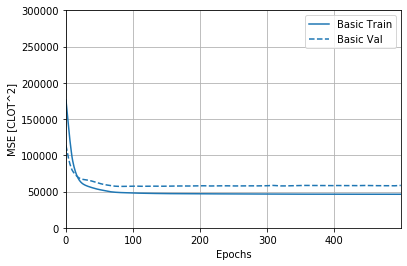

In [24]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 300000])
plt.ylabel('MSE [CLOT^2]')

In [25]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# use early stop to prevent overfitting.
early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:262400.0004,  mae:229.6849,  mse:262399.7812,  val_loss:175805.6164,  val_mae:203.5986,  val_mse:175805.3281,  
....................................................................................................
Epoch: 100, loss:48226.3499,  mae:148.0129,  mse:48222.2812,  val_loss:59226.6683,  val_mae:159.6730,  val_mse:59222.5938,  
......

Text(0, 0.5, 'MAE [CLOT]')

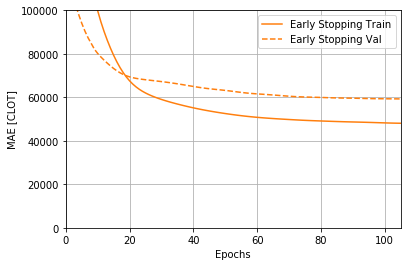

In [27]:
plotter.plot({'Early Stopping': early_history}, metric = "mse")
plt.ylim([0, 100000])
plt.ylabel('MAE [CLOT]')

In [28]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} CLOT`".format(mae))

1267/1267 - 0s - loss: 55053.4186 - mae: 159.1926 - mse: 55049.3086
Testing set Mean Abs Error: 159.19 CLOT`


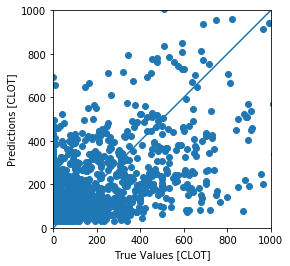

In [29]:
test_predictions = model.predict(normed_test_data).flatten()
# flatten is used to reshape in order to match the dimension

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [CLOT]')
plt.ylabel('Predictions [CLOT]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

(0, 1000)

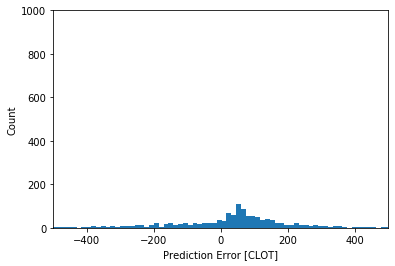

In [30]:
error = test_predictions - test_labels
plt.hist(error, bins = 200)
plt.xlabel("Prediction Error [CLOT]")
_ = plt.ylabel("Count")
plt.xlim([-500, 500])
plt.ylim([0, 1000])

In [33]:
def accurate(test_predictions, test_labels):
    RSS = np.sum((test_predictions - test_labels.values)**2)
    TSS = np.sum((test_labels.values-clot_mean)**2)
    r2 = 1 - (RSS/TSS)
    return r2

RSS = np.sum((test_predictions - test_labels.values)**2)
TSS = np.sum((test_labels.values-clot_mean)**2)
print(RSS)
print(TSS)
print(accurate(test_predictions, test_labels))

#so the model is 72% accurate

69747470.14623424
246020435.8391382
0.7164972498795221
